In [117]:
import pandas as pd
import matplotlib as plt
from matplotlib import pyplot as pyplt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
sns.set_style("whitegrid")

In [118]:
sns.color_palette("mako", as_cmap=True)
sns.set_palette("mako")

In [119]:
%config InlineBackend.figure_format = 'svg'

In [120]:
%%html
<style>
.output_svg div{
  width: 100% !important;
  height: 100% !important;
}
</style>

In [121]:
data_int_self = pd.read_csv("results_int_self.txt", sep = ";", header = None);
data_int_self.columns = ["Function_Name", "Number_of_elements", "Time_ms"] 
data_int_self_sans = data_int_self.copy();
data_int_self["Function_Name"] = data_int_self["Function_Name"].apply(lambda x: "self_" + x);
data_int_self = data_int_self.drop(data_int_self[data_int_self.Number_of_elements == 0].index);
#print(data_int_self.head(10));

In [122]:
data_int_set = pd.read_csv("results_int_set.txt", sep = ";", header = None);
data_int_set.columns = ["Function_Name", "Number_of_elements", "Time_ms"];
data_int_set_sans = data_int_set.copy();
data_int_set["Function_Name"] = data_int_set["Function_Name"].apply(lambda x: "stl_" + x);
data_int_set = data_int_set.drop(data_int_set[data_int_set.Number_of_elements == 0].index);
#print(data_int_set.head(10));

In [123]:
data_string_self = pd.read_csv("results_string_self.txt", sep = ";", header = None);
data_string_self.columns = ["Function_Name", "Number_of_elements", "Time_ms"];
data_string_self_sans = data_string_self.copy();
data_string_self["Function_Name"] = data_string_self["Function_Name"].apply(lambda x: "self_" + x);
data_string_self = data_string_self.drop(data_string_self[data_string_self.Number_of_elements == 0].index);
#print(data_string_self.head(10));

In [124]:
data_string_set = pd.read_csv("results_string_set.txt", sep = ";", header = None);
data_string_set.columns = ["Function_Name", "Number_of_elements", "Time_ms"];
data_string_set_sans = data_string_set.copy();
data_string_set["Function_Name"] = data_string_set["Function_Name"].apply(lambda x: "stl_" + x);
data_string_set = data_string_set.drop(data_string_set[data_string_set.Number_of_elements == 0].index);
#print(data_string_set.head(10));

In [125]:
data_int = pd.concat([data_int_self, data_int_set]);
data_string = pd.concat([data_string_self, data_string_set]);

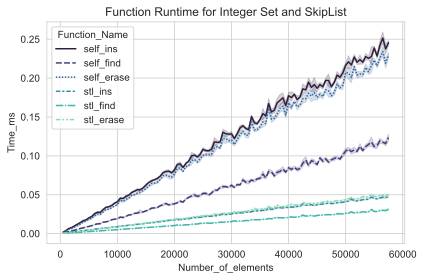

In [126]:
plot = sns.lineplot(data = data_int, y = "Time_ms", x = "Number_of_elements", 
                    hue = "Function_Name", style = "Function_Name"  ).set(title = "Function Runtime for Integer Set and SkipList");
pyplt.rcParams["figure.autolayout"] = True
pyplt.savefig('plots/runtime_int_300.png', dpi = 300)

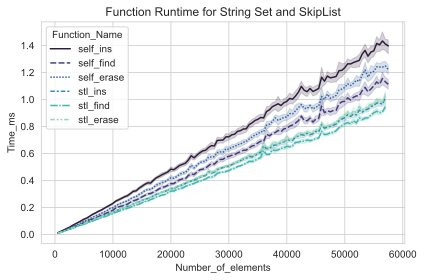

In [127]:
sns.lineplot(data = data_string, y = "Time_ms", 
             x = "Number_of_elements", hue = "Function_Name", style = "Function_Name" ).set(title = "Function Runtime for String Set and SkipList");
pyplt.rcParams["figure.autolayout"] = True
pyplt.savefig('plots/runtime_string_300.png', dpi = 300)

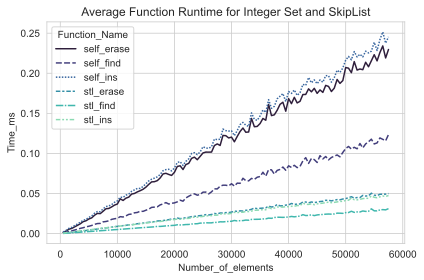

In [128]:
avg_int_self = data_int_self.groupby(["Function_Name", "Number_of_elements"])
avg_int_self = avg_int_self.mean("Time_ms")
avg_int_set = data_int_set.groupby(["Function_Name", "Number_of_elements"])
avg_int_set = avg_int_set.mean("Time_ms")
avg_int = pd.concat([avg_int_self, avg_int_set]);
sns.lineplot(data = avg_int, y = "Time_ms", x = "Number_of_elements", 
             hue = "Function_Name", style = "Function_Name" ).set(title = "Average Function Runtime for Integer Set and SkipList");
pyplt.rcParams["figure.autolayout"] = True
pyplt.savefig('plots/average_int_300.png', dpi = 300)
#avg_int.head(100)

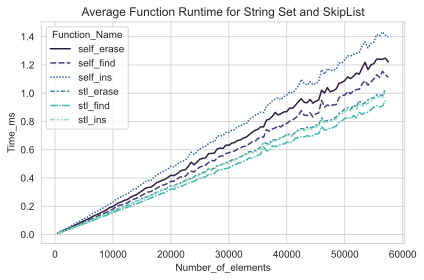

In [129]:
avg_str_self = data_string_self.groupby(["Function_Name", "Number_of_elements"])
avg_str_self = avg_str_self.mean("Time_ms")
avg_str_set = data_string_set.groupby(["Function_Name", "Number_of_elements"])
avg_str_set = avg_str_set.mean("Time_ms")
avg_str = pd.concat([avg_str_self, avg_str_set]);
sns.lineplot(data = avg_str, y = "Time_ms", x = "Number_of_elements", 
             hue = "Function_Name" ,style = "Function_Name").set(title = "Average Function Runtime for String Set and SkipList");
pyplt.rcParams["figure.autolayout"] = True
pyplt.savefig('plots/average_string_300.png', dpi = 300)

In [130]:
sns.scatterplot(data = data_int, 
                x = "Number_of_elements", y = "Time_ms", 
                hue = "Function_Name", style = "Function_Name").set(title = "Function Runtime for Integer Set and SkipList (Scatter Plot)");
pyplt.rcParams["figure.autolayout"] = True
pyplt.savefig('plots/average_int_scatter_300.png', dpi = 300)

In [131]:
sns.scatterplot(data = data_string, x = "Number_of_elements", y = "Time_ms", 
                hue = "Function_Name", style = "Function_Name").set(title = "Function Runtime for String Set and SkipList (Scatter Plot)")
pyplt.rcParams["figure.autolayout"] = True
pyplt.savefig('plots/average_string_scatter_300.png', dpi = 300)

In [132]:
data_int["Function_Name"] = data_int["Function_Name"].apply(lambda x: "int_" + x);
data_string["Function_Name"] = data_string["Function_Name"].apply(lambda x: "string_" + x);
data_tot = pd.concat([data_int, data_string]);

In [133]:
#sns.scatterplot(data = data_tot, x = "Number_of_elements", y = "Time_ms", hue = "Function_Name")

In [134]:
#sns.lineplot(data = data_tot, x = "Number_of_elements", y = "Time_ms", hue = "Function_Name")

In [135]:
# model = LinearRegression();
# int_x = np.array(data_int["Number_of_elements"]).reshape((-1,1));
# int_y = np.array(data_int["Time_ms"]);
# model = LinearRegression().fit(int_x,int_y)
# r_sq = model.score(int_x, int_y)
# print('coefficient of determination:', r_sq)
# print('intercept:', model.intercept_)
# print('slope:', model.coef_)

In [136]:
#sns.scatterplot(data = data_int, x = data_int["Number_of_elements"], y = data_int["Time_ms"]);

In [137]:
avg_int_ratio = avg_int;
avg_int_ratio["Ratio"] = avg_int_ratio["Time_ms"].div(avg_int_ratio.groupby("Function_Name")["Time_ms"].shift(1));

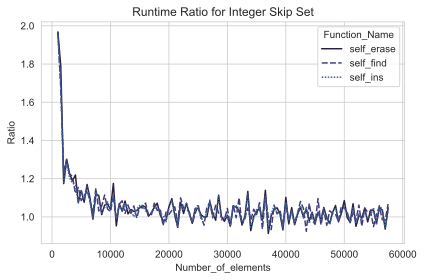

In [138]:
avg_int_ratio_self = avg_int_self
avg_int_ratio_self["Ratio"] = avg_int_ratio_self["Time_ms"].div(avg_int_ratio_self.groupby("Function_Name")["Time_ms"].shift(1));
avg_int_ratio_self.dropna();
sns.lineplot(data = avg_int_ratio_self, x = "Number_of_elements", y = "Ratio", 
             hue = "Function_Name", style = "Function_Name").set(title = "Runtime Ratio for Integer Skip Set")
pyplt.rcParams["figure.autolayout"] = True
pyplt.savefig('plots/runtime_ratio_integer_self_300.png', dpi = 300)

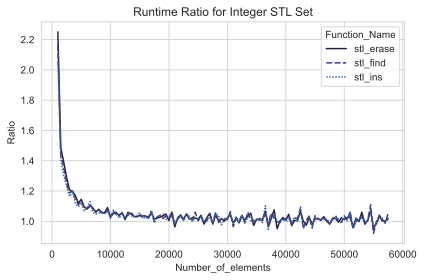

In [139]:
avg_int_ratio_set = avg_int_set
avg_int_ratio_set["Ratio"] = avg_int_ratio_set["Time_ms"].div(avg_int_ratio_set.groupby("Function_Name")["Time_ms"].shift(1));
avg_int_ratio_set.dropna();
sns.lineplot(data = avg_int_ratio_set, x = "Number_of_elements", y = "Ratio", 
             hue = "Function_Name", style = "Function_Name").set(title = "Runtime Ratio for Integer STL Set")
pyplt.rcParams["figure.autolayout"] = True
pyplt.savefig('plots/runtime_ratio_integer_set_300.png', dpi = 300)

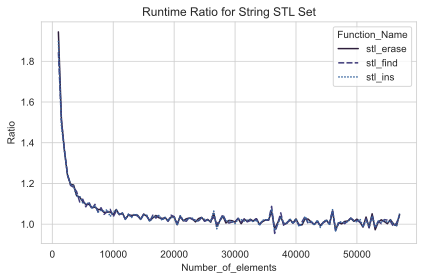

In [140]:
avg_string_ratio_set = avg_str_set
avg_string_ratio_set["Ratio"] = avg_string_ratio_set["Time_ms"].div(avg_string_ratio_set.groupby("Function_Name")["Time_ms"].shift(1));
avg_string_ratio_set.dropna();
sns.lineplot(data = avg_string_ratio_set, x = "Number_of_elements", y = "Ratio", 
             hue = "Function_Name", style = "Function_Name").set(title = "Runtime Ratio for String STL Set")
pyplt.rcParams["figure.autolayout"] = True
pyplt.savefig('plots/runtime_ratio_string_set_300.png', dpi = 300)

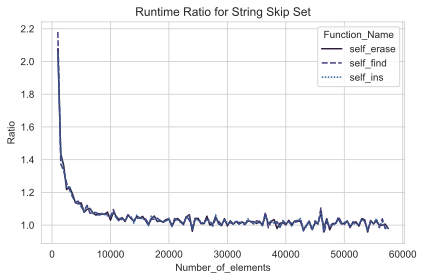

In [141]:
avg_string_ratio_self = avg_str_self
avg_string_ratio_self["Ratio"] = avg_string_ratio_self["Time_ms"].div(avg_string_ratio_self.groupby("Function_Name")["Time_ms"].shift(1));
avg_string_ratio_self.dropna();
sns.lineplot(data = avg_string_ratio_self, x = "Number_of_elements", y = "Ratio", 
             hue = "Function_Name", style = "Function_Name").set(title = "Runtime Ratio for String Skip Set")
pyplt.rcParams["figure.autolayout"] = True
pyplt.savefig('plots/runtime_ratio_string_self_300.png', dpi = 300)

In [142]:
data_int_sans = data_int_self_sans.merge(data_int_set_sans, on=['Function_Name', 'Number_of_elements']);
data_int_sans.columns = ["Function_Name", "Number_of_elements", "Time_ms_self", "Time_ms_set"]; 
avg_int_sans = data_int_sans.groupby(["Function_Name", "Number_of_elements"]).agg({"Time_ms_self" : 'mean', "Time_ms_set" : 'mean'})
avg_int_sans["Ratio"] = (avg_int_sans["Time_ms_self"] / avg_int_sans["Time_ms_set"] )- 1;

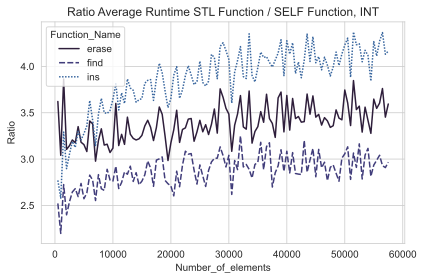

In [143]:
sns.lineplot(data = avg_int_sans, x = "Number_of_elements", y = "Ratio", 
             hue = "Function_Name", style = "Function_Name").set(title = "Ratio Average Runtime STL Function / SELF Function, INT")
pyplt.rcParams["figure.autolayout"] = True
pyplt.savefig('plots/ratio_int_func_300.png', dpi = 300)

In [144]:
data_string_sans = data_string_self_sans.merge(data_string_set_sans, on=['Function_Name', 'Number_of_elements']);
data_string_sans.columns = ["Function_Name", "Number_of_elements", "Time_ms_self", "Time_ms_set"]; 
avg_string_sans = data_string_sans.groupby(["Function_Name", "Number_of_elements"]).agg({"Time_ms_self" : 'mean', "Time_ms_set" : 'mean'})
avg_string_sans["Ratio"] = (avg_string_sans["Time_ms_self"] / avg_string_sans["Time_ms_set"] )- 1;

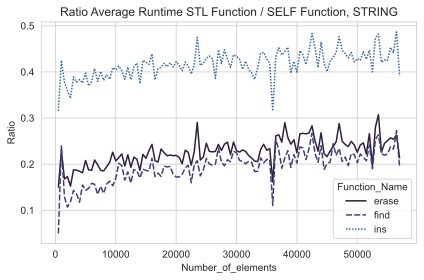

In [145]:
sns.lineplot(data = avg_string_sans, x = "Number_of_elements", y = "Ratio", 
             hue = "Function_Name", style = "Function_Name").set(title = "Ratio Average Runtime STL Function / SELF Function, STRING")
pyplt.rcParams["figure.autolayout"] = True
pyplt.savefig('plots/ratio_string_func_300.png', dpi = 300)